In [1]:
import numpy as np
import import_data_from_3D_ncfiles as import_data
import os
from matplotlib import pyplot as plt

In [2]:
##############################################################
# Modify filepath and filepath_out
##############################################################

run = '24_05_15_Long_box_run_1'

data_directory = run + '/ncfiles/'
filepath_out = run + '/analysis/'

if not os.path.exists(filepath_out):
    os.mkdir(filepath_out)

In [3]:
##############################################################
# List times     
##############################################################

times = []
for file in os.listdir(data_directory):
    time = file[-8:-3]
    time = int(time)
    times.append(time)
    
times = sorted(list(set(times)))

Extracting simulation data for time 00000
Extracting simulation data for time 00010
Extracting simulation data for time 00030
Extracting simulation data for time 00050
Extracting simulation data for time 00070
Extracting simulation data for time 00090
Extracting simulation data for time 00100
Extracting simulation data for time 00105
Extracting simulation data for time 00110
Extracting simulation data for time 00115
Extracting simulation data for time 00120
Extracting simulation data for time 00125
Extracting simulation data for time 00130
Extracting simulation data for time 00135
Extracting simulation data for time 00140
Extracting simulation data for time 00145
Extracting simulation data for time 00150
Extracting simulation data for time 00155
Extracting simulation data for time 00160
Extracting simulation data for time 00165
Extracting simulation data for time 00170
Extracting simulation data for time 00175
Extracting simulation data for time 00180
Extracting simulation data for tim

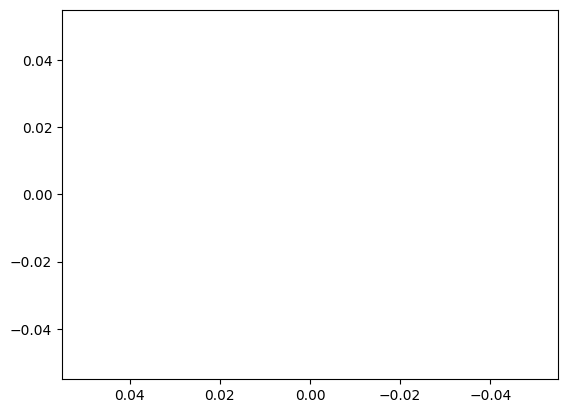

In [8]:
for time in times:
    time_string = str(time).zfill(5)
    
    ##############################################################
    # Extract Data      
    ##############################################################

    x, y, z, nx0, ny0, nz0, N, T, Vx, Vy, Vz, V, Ex, Ey, Ez, E, Bx, By, Bz, B = import_data.load_data_3D(data_directory, time)

    ##############################################################
    # Average along y and z axis to get a line (this only makes sense for a "long" box)    
    ##############################################################

    E_long = np.mean(E, axis=(1,2))
    B_long = np.mean(B, axis=(1,2))
    V_long = np.mean(V, axis=(1,2))
    N_long = np.mean(N, axis=(1,2))
    
    plt.clf()
    plt.plot(x, N_long)
    plt.gca().invert_xaxis()
    plt.savefig(filepath_out + f"N_{time}")
    
    plt.clf()
    plt.plot(x, B_long)
    plt.gca().invert_xaxis()
    plt.savefig(filepath_out + f"B_{time}")
    
    plt.clf()
    plt.plot(x, V_long)
    plt.gca().invert_xaxis()
    plt.savefig(filepath_out + f"V_{time}")

**Note:**
The units are not all in SI.

[B] = nT 

[V] = m/s

[E] = nV/m [?]

[N] = number / cubic centimetre

[T] = eV

[x] = $c \omega_{pi}$